In [16]:
import numpy as np
import imageio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 6)

In [2]:
files = !dir /B C:\Users\Jobin\Ds\Datasets\EPL_logo\epl-logos-big\epl-logos-big\arsenal

# Inspecting image 

In [3]:
file_path = 'C:\\Users\\Jobin\\Ds\\Datasets\\EPL_logo\\epl-logos-big\\epl-logos-big\\arsenal\\'
shapes = np.asarray([imageio.imread(file_path + f).shape for f in files])

Text(0.5, 0, 'height')

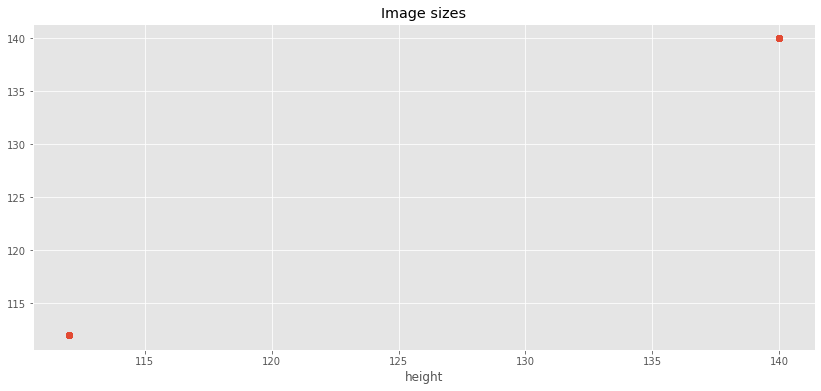

In [4]:
plt.plot(shapes[:, 0], shapes[:, 1], 'o')
plt.title('Image sizes')
plt.xlabel('width')
plt.xlabel('height')
# The images are of two sizes 112 and 140 pixels
# Now lets see the frequency of each

Text(0.5, 1.0, 'Width distribution')

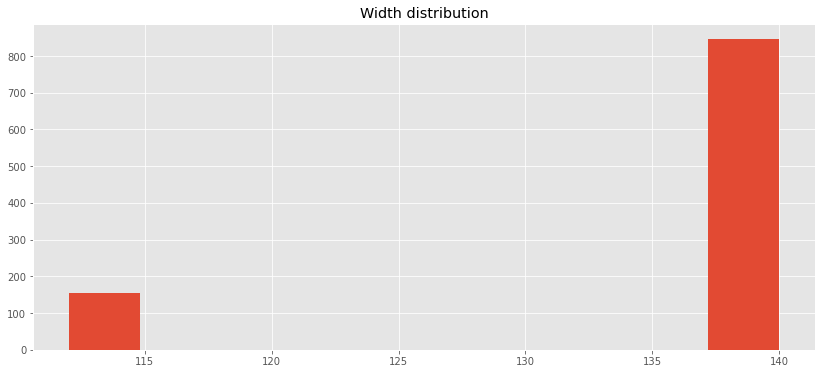

In [5]:
plt.hist(shapes[:, 0], bins=10)
plt.title('Width distribution')
# The 140 pixel images are higher comparatively

In [6]:
np.array(np.unique(shapes[:, 0], return_counts=True)).T

array([[112, 154],
       [140, 846]], dtype=int64)

3


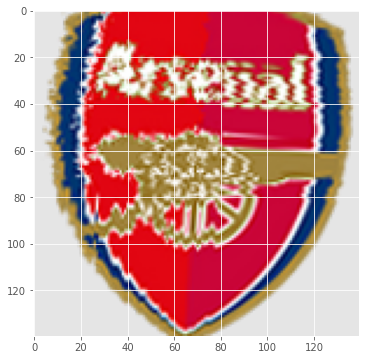

In [7]:
img = mpimg.imread(file_path+files[0])
plt.imshow(img)
print(len(img.shape))

In [8]:
# this image has 4 channels
shapes[0][-1]

4

In [9]:
# each image has 4 channels
np.array(np.unique(shapes[:, 2], return_counts=True)).T

array([[   4, 1000]], dtype=int64)

# Modeling

In [17]:
import tensorflow as tf
from utils import create_generators
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, BatchNormalization, GlobalAvgPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

def train_model(model):
    train_path = 'C:\\Users\\Jobin\\Ds\\Datasets\\EPL_logo\\data\\train'
    val_path = 'C:\\Users\\Jobin\\Ds\\Datasets\\EPL_logo\\data\\val'
    test_path = 'C:\\Users\\Jobin\\Ds\\Datasets\\EPL_logo\\data\\test'

    batch_size = 64
    epochs = 10

    train_gen, val_gen, test_gen = create_generators(batch_size, train_path, val_path, test_path)


    early_stop = EarlyStopping(monitor='val_accuracy', patience=7)


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_gen,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=[early_stop]
    )

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
    return history

In [11]:
model_1 = tf.keras.Sequential([
    Input(shape=(140, 140, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(20, activation='softmax')
])

history = train_model(model_1)

Found 14000 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Epoch 1/10
219/219 [==============================] - 139s 605ms/step - loss: 0.8347 - accuracy: 0.9296 - val_loss: 0.1866 - val_accuracy: 0.9417
Epoch 2/10
219/219 [==============================] - 25s 116ms/step - loss: 0.0612 - accuracy: 0.9891 - val_loss: 0.2248 - val_accuracy: 0.9490
Epoch 3/10
219/219 [==============================] - 24s 107ms/step - loss: 0.0229 - accuracy: 0.9956 - val_loss: 0.0156 - val_accuracy: 0.9970
Epoch 4/10
219/219 [==============================] - 24s 108ms/step - loss: 0.0382 - accuracy: 0.9943 - val_loss: 0.2479 - val_accuracy: 0.9720
Epoch 5/10
219/219 [==============================] - 24s 107ms/step - loss: 0.1298 - accuracy: 0.9879 - val_loss: 2.6605 - val_accuracy: 0.9493
Epoch 6/10
219/219 [==============================] - 21s 96ms/step - loss: 0.0574 - accuracy: 0.9931 - val_loss: 0.1712 - val_accuracy: 0.9750


<AxesSubplot:>

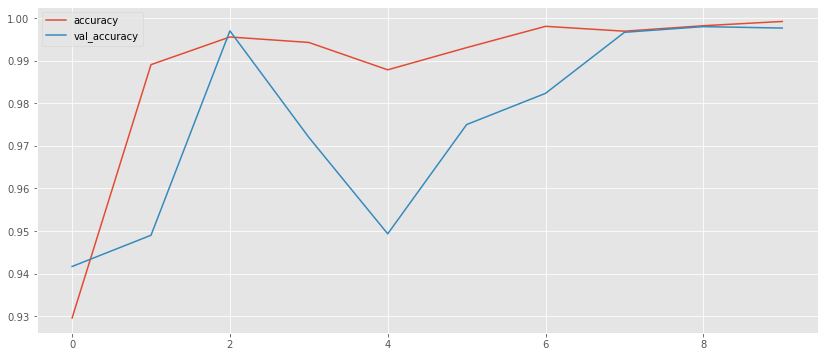

In [15]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

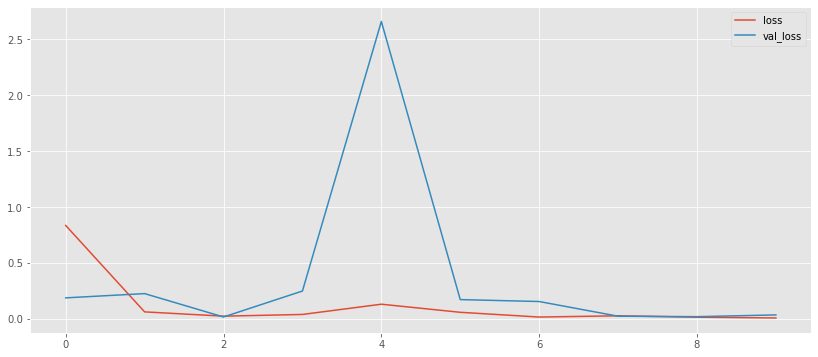

In [19]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

Found 14000 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Epoch 1/10
219/219 [==============================] - 27s 115ms/step - loss: 0.8928 - accuracy: 0.8146 - val_loss: 2.3710 - val_accuracy: 0.2327
Epoch 2/10
219/219 [==============================] - 19s 86ms/step - loss: 0.1166 - accuracy: 0.9888 - val_loss: 0.8922 - val_accuracy: 0.7157
Epoch 3/10
219/219 [==============================] - 19s 85ms/step - loss: 0.0443 - accuracy: 0.9974 - val_loss: 0.0877 - val_accuracy: 0.9850
Epoch 4/10
219/219 [==============================] - 19s 85ms/step - loss: 0.0229 - accuracy: 0.9994 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 5/10
219/219 [==============================] - 19s 87ms/step - loss: 0.0134 - accuracy: 0.9996 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 6/10
219/219 [==============================] - 19s 86ms/step - loss: 0.0098 - accuracy: 0.9997 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch

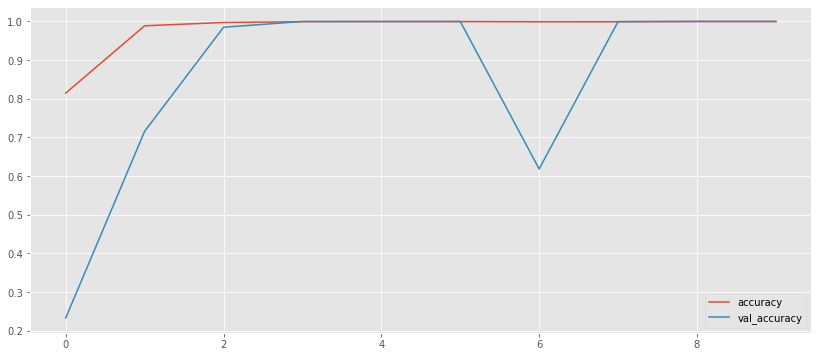

In [20]:
model_2 = tf.keras.Sequential([
    Input(shape=(140, 140, 3)),
    Conv2D(36, (3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(60, (3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    GlobalAvgPool2D(),
    Dense(64, activation='relu'),
    Dense(20, activation='softmax')
])

history = train_model(model_2)

Found 14000 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.
Epoch 1/10
219/219 [==============================] - 21s 90ms/step - loss: 0.7157 - accuracy: 0.8665 - val_loss: 4.9499 - val_accuracy: 0.1040
Epoch 2/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0457 - accuracy: 0.9985 - val_loss: 3.0981 - val_accuracy: 0.2650
Epoch 3/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0134 - accuracy: 0.9999 - val_loss: 0.0654 - val_accuracy: 0.9923
Epoch 4/10
219/219 [==============================] - 19s 87ms/step - loss: 0.0065 - accuracy: 0.9999 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/10
219/219 [==============================] - 19s 87ms/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/10
219/219 [==============================] - 19s 86ms/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 2.6108 - val_accuracy: 0.5840
Epoch 

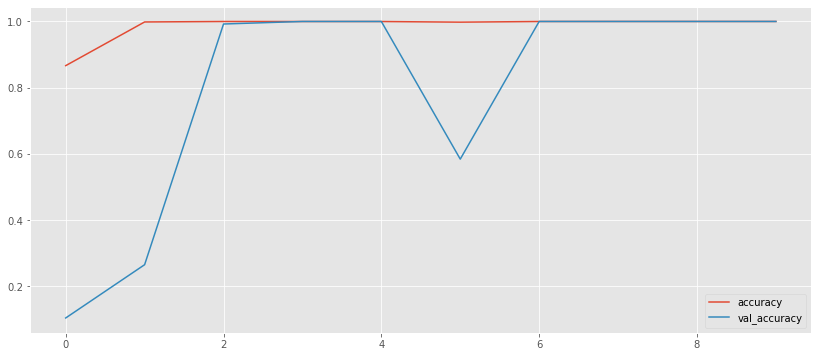

In [21]:
model_3 = tf.keras.Sequential([
    Input(shape=(140, 140, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    GlobalAvgPool2D(),
    Dense(128, activation='relu'),
    Dense(20, activation='softmax')
])

history = train_model(model_3)